In [0]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz
!tar xf spark-2.4.3-bin-hadoop2.7.tgz
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.3-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()


In [124]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [125]:
sc.parallelize([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).map(lambda x : x**2).sum()

385

# CREATE A RDD

In [126]:
wordsList = ['cat', 'elephant', 'rat', 'rat', 'cat']
wordsRDD = sc.parallelize(wordsList, 4)
print(type(wordsRDD))

<class 'pyspark.rdd.RDD'>


In [0]:
?sc.parallelize()

In [128]:
sc.parallelize([0, 2, 3, 4, 6], 5).glom().collect()

[[0], [2], [3], [4], [6]]

In [129]:
sc.parallelize(range(0, 6, 2), 5).glom().collect()

[[], [0], [], [2], [4]]

In [130]:
wordsRDD.collect()

['cat', 'elephant', 'rat', 'rat', 'cat']

# OPERATIONS ON RDD

**RDDs support two types of operations: transformations, which create a new dataset from an existing one, and actions, which return a value to the driver program after running a computation on the dataset. For example, map is a transformation that passes each dataset element through a function and returns a new RDD representing the results. On the other hand, reduce is an action that aggregates all the elements of the RDD using some function and returns the final result to the driver program (although there is also a parallel reduceByKey that returns a distributed dataset).**

**Word Examples**

In [131]:
def makePlural(word):
  return word + 's'

print(makePlural('cat'))

cats


Transform one RDD into another

In [132]:
pluralRDD = wordsRDD.map(makePlural)
print(pluralRDD.first())
print(pluralRDD.take(2))

cats
['cats', 'elephants']


In [133]:
pluralRDD.take(1)

['cats']

In [134]:
pluralRDD.collect()

['cats', 'elephants', 'rats', 'rats', 'cats']

**Key Value Pairs**

In [135]:
wordPairs = wordsRDD.map(lambda w : (w, 1))
print(wordPairs.collect())

[('cat', 1), ('elephant', 1), ('rat', 1), ('rat', 1), ('cat', 1)]


# WORD COUNT

In [136]:
wordsList = ['cat', 'elephant', 'rat', 'rat', 'cat']
wordsRDD = sc.parallelize(wordsList, 4)
wordCountsCollected = (wordsRDD.map(lambda w : (w, 1)).reduceByKey(lambda x,y : x+y).collect())
print(wordCountsCollected)

[('cat', 2), ('elephant', 1), ('rat', 2)]


In [137]:
print(wordsRDD.map(lambda w : (w, 1)).reduceByKey(lambda x,y : x+y).toDebugString())

b'(4) PythonRDD[127] at RDD at PythonRDD.scala:53 []\n |  MapPartitionsRDD[126] at mapPartitions at PythonRDD.scala:133 []\n |  ShuffledRDD[125] at partitionBy at NativeMethodAccessorImpl.java:0 []\n +-(4) PairwiseRDD[124] at reduceByKey at <ipython-input-137-d5b08b0128d1>:1 []\n    |  PythonRDD[123] at reduceByKey at <ipython-input-137-d5b08b0128d1>:1 []\n    |  ParallelCollectionRDD[117] at parallelize at PythonRDD.scala:195 []'


# Using Cache

In [138]:
wordsList = ['cat', 'elephant', 'rat', 'rat', 'cat']
wordsRDD = sc.parallelize(wordsList, 4)
print(wordsRDD)
wordsRDD.count()

ParallelCollectionRDD[128] at parallelize at PythonRDD.scala:195


5

In [139]:
wordsRDD.count()

5

In [140]:
wordsRDD.cache()

ParallelCollectionRDD[128] at parallelize at PythonRDD.scala:195

In [141]:
wordsRDD.count()

5

In [142]:
wordsRDD.count()

5

**Where is this useful: it is when you have branching parts or loops, so that you dont do things again and again. Spark, being "lazy" will rerun the chain again. So cache or persist serves as a checkpoint, breaking the RDD chain or the lineage.**

In [143]:
birdsList = ['heron', 'owl']
animList = wordsList + birdsList

animaldict = {}
for e in wordsList:
  animaldict[e] = 'mammal'
for e in birdsList:
  animaldict[e] = 'bird'
  
animaldict

{'cat': 'mammal',
 'elephant': 'mammal',
 'heron': 'bird',
 'owl': 'bird',
 'rat': 'mammal'}

In [144]:
animsrdd = sc.parallelize(animList, 4)
animsrdd.cache()

mammalcount = animsrdd.filter(lambda w : animaldict[w] == 'mammal').count()
birdcount = animsrdd.filter(lambda w : animaldict[w] == 'bird').count()

print(mammalcount, birdcount)

5 2


In [166]:
from google.colab import files
upload = files.upload()

Saving juliuscaeser.txt to juliuscaeser.txt


In [0]:
stopwords = [e.strip() for e in open('english.stop.txt').readlines()]

In [0]:
juliusrdd = sc.textFile('juliuscaeser.txt')

In [171]:
juliusrdd.flatMap(lambda line : line.split()).count()

21245

In [172]:
(juliusrdd.flatMap(lambda line : line.split()).map(lambda word : word.strip().lower()).collect())

['1599',
 'the',
 'tragedy',
 'of',
 'julius',
 'caesar',
 'by',
 'william',
 'shakespeare',
 'dramatis',
 'personae',
 'julius',
 'caesar,',
 'roman',
 'statesman',
 'and',
 'general',
 'octavius,',
 'triumvir',
 'after',
 "caesar's",
 'death,',
 'later',
 'augustus',
 'caesar,',
 'first',
 'emperor',
 'of',
 'rome',
 'mark',
 'antony,',
 'general',
 'and',
 'friend',
 'of',
 'caesar,',
 'a',
 'triumvir',
 'after',
 'his',
 'death',
 'lepidus,',
 'third',
 'member',
 'of',
 'the',
 'triumvirate',
 'marcus',
 'brutus,',
 'leader',
 'of',
 'the',
 'conspiracy',
 'against',
 'caesar',
 'cassius,',
 'instigator',
 'of',
 'the',
 'conspiracy',
 'casca,',
 'conspirator',
 'against',
 'caesar',
 'trebonius,',
 '"',
 '"',
 '"',
 'caius',
 'ligarius,',
 '"',
 '"',
 '"',
 'decius',
 'brutus,',
 '"',
 '"',
 '"',
 'metellus',
 'cimber,',
 '"',
 '"',
 '"',
 'cinna,',
 '"',
 '"',
 '"',
 'calpurnia,',
 'wife',
 'of',
 'caesar',
 'portia,',
 'wife',
 'of',
 'brutus',
 'cicero,',
 'senator',
 'popiliu

In [173]:
(juliusrdd.flatMap(lambda line : line.split()).map(lambda word : word.strip().lower()).take(20))

['1599',
 'the',
 'tragedy',
 'of',
 'julius',
 'caesar',
 'by',
 'william',
 'shakespeare',
 'dramatis',
 'personae',
 'julius',
 'caesar,',
 'roman',
 'statesman',
 'and',
 'general',
 'octavius,',
 'triumvir',
 'after']

In [174]:
(juliusrdd.flatMap(lambda line : line.split()).map(lambda word : word.strip().lower()).filter(lambda word : word not in stopwords).collect())

['1599',
 'tragedy',
 'julius',
 'caesar',
 'william',
 'shakespeare',
 'dramatis',
 'personae',
 'julius',
 'caesar,',
 'roman',
 'statesman',
 'general',
 'octavius,',
 'triumvir',
 "caesar's",
 'death,',
 'augustus',
 'caesar,',
 'emperor',
 'rome',
 'mark',
 'antony,',
 'general',
 'friend',
 'caesar,',
 'triumvir',
 'death',
 'lepidus,',
 'member',
 'triumvirate',
 'marcus',
 'brutus,',
 'leader',
 'conspiracy',
 'caesar',
 'cassius,',
 'instigator',
 'conspiracy',
 'casca,',
 'conspirator',
 'caesar',
 'trebonius,',
 '"',
 '"',
 '"',
 'caius',
 'ligarius,',
 '"',
 '"',
 '"',
 'decius',
 'brutus,',
 '"',
 '"',
 '"',
 'metellus',
 'cimber,',
 '"',
 '"',
 '"',
 'cinna,',
 '"',
 '"',
 '"',
 'calpurnia,',
 'wife',
 'caesar',
 'portia,',
 'wife',
 'brutus',
 'cicero,',
 'senator',
 'popilius,',
 '"',
 'popilius',
 'lena,',
 '"',
 'flavius,',
 'tribune',
 'marullus,',
 'tribune',
 'cato,',
 'supportor',
 'brutus',
 'lucilius,',
 '"',
 '"',
 '"',
 'titinius,',
 '"',
 '"',
 '"',
 'messala

In [175]:
(juliusrdd.flatMap(lambda line : line.split()).map(lambda word : word.strip().lower()).filter(lambda word : word not in stopwords).take(20))

['1599',
 'tragedy',
 'julius',
 'caesar',
 'william',
 'shakespeare',
 'dramatis',
 'personae',
 'julius',
 'caesar,',
 'roman',
 'statesman',
 'general',
 'octavius,',
 'triumvir',
 "caesar's",
 'death,',
 'augustus',
 'caesar,',
 'emperor']

In [176]:
(juliusrdd.flatMap(lambda line : line.split()).map(lambda word : word.strip().lower()).filter(lambda word : word not in stopwords).map(lambda word : (word, 1)).collect())

[('1599', 1),
 ('tragedy', 1),
 ('julius', 1),
 ('caesar', 1),
 ('william', 1),
 ('shakespeare', 1),
 ('dramatis', 1),
 ('personae', 1),
 ('julius', 1),
 ('caesar,', 1),
 ('roman', 1),
 ('statesman', 1),
 ('general', 1),
 ('octavius,', 1),
 ('triumvir', 1),
 ("caesar's", 1),
 ('death,', 1),
 ('augustus', 1),
 ('caesar,', 1),
 ('emperor', 1),
 ('rome', 1),
 ('mark', 1),
 ('antony,', 1),
 ('general', 1),
 ('friend', 1),
 ('caesar,', 1),
 ('triumvir', 1),
 ('death', 1),
 ('lepidus,', 1),
 ('member', 1),
 ('triumvirate', 1),
 ('marcus', 1),
 ('brutus,', 1),
 ('leader', 1),
 ('conspiracy', 1),
 ('caesar', 1),
 ('cassius,', 1),
 ('instigator', 1),
 ('conspiracy', 1),
 ('casca,', 1),
 ('conspirator', 1),
 ('caesar', 1),
 ('trebonius,', 1),
 ('"', 1),
 ('"', 1),
 ('"', 1),
 ('caius', 1),
 ('ligarius,', 1),
 ('"', 1),
 ('"', 1),
 ('"', 1),
 ('decius', 1),
 ('brutus,', 1),
 ('"', 1),
 ('"', 1),
 ('"', 1),
 ('metellus', 1),
 ('cimber,', 1),
 ('"', 1),
 ('"', 1),
 ('"', 1),
 ('cinna,', 1),
 ('"', 

In [177]:
(juliusrdd.flatMap(lambda line : line.split()).map(lambda word : word.strip().lower()).filter(lambda word : word not in stopwords).map(lambda word : (word, 1)).take(20))

[('1599', 1),
 ('tragedy', 1),
 ('julius', 1),
 ('caesar', 1),
 ('william', 1),
 ('shakespeare', 1),
 ('dramatis', 1),
 ('personae', 1),
 ('julius', 1),
 ('caesar,', 1),
 ('roman', 1),
 ('statesman', 1),
 ('general', 1),
 ('octavius,', 1),
 ('triumvir', 1),
 ("caesar's", 1),
 ('death,', 1),
 ('augustus', 1),
 ('caesar,', 1),
 ('emperor', 1)]

In [178]:
(juliusrdd.flatMap(lambda line : line.split()).map(lambda word : word.strip().lower()).filter(lambda word : word not in stopwords).map(lambda word : (word, 1)).reduceByKey(lambda a,b : a + b).collect())

[('1599', 1),
 ('tragedy', 1),
 ('julius', 4),
 ('caesar', 96),
 ('shakespeare', 6),
 ('dramatis', 1),
 ('roman', 11),
 ('statesman', 1),
 ('triumvir', 2),
 ("caesar's", 40),
 ('death,', 6),
 ('mark', 33),
 ('antony,', 28),
 ('marcus', 7),
 ('leader', 1),
 ('instigator', 1),
 ('trebonius,', 4),
 ('"', 44),
 ('caius', 11),
 ('ligarius,', 6),
 ('decius', 6),
 ('metellus', 9),
 ('cimber,', 3),
 ('cinna,', 7),
 ('senator', 1),
 ('popilius', 3),
 ('messala,', 10),
 ('rhetoric', 1),
 ('poet', 2),
 ('varro,', 1),
 ('strato,', 5),
 ('pindarus,', 4),
 ('ghost', 3),
 ('citizens,', 2),
 ('<<this', 5),
 ('version', 5),
 ('copyright', 5),
 ('world', 13),
 ('library,', 5),
 ('project', 5),
 ('gutenberg', 5),
 ('carnegie', 5),
 ('mellon', 5),
 ('university', 5),
 ('permission.', 5),
 ('machine', 5),
 ('long', 6),
 ('only,', 6),
 ('(2)', 5),
 ('commercially.', 5),
 ('prohibited', 5),
 ('commercial', 5),
 ('distribution', 5),
 ('service', 6),
 ('charges', 6),
 ("conspirators'", 1),
 ('sardis,', 2),
 ('

In [179]:
(juliusrdd.flatMap(lambda line : line.split()).map(lambda word : word.strip().lower()).filter(lambda word : word not in stopwords).map(lambda word : (word, 1)).reduceByKey(lambda a,b : a + b).take(20))

[('1599', 1),
 ('tragedy', 1),
 ('julius', 4),
 ('caesar', 96),
 ('shakespeare', 6),
 ('dramatis', 1),
 ('roman', 11),
 ('statesman', 1),
 ('triumvir', 2),
 ("caesar's", 40),
 ('death,', 6),
 ('mark', 33),
 ('antony,', 28),
 ('marcus', 7),
 ('leader', 1),
 ('instigator', 1),
 ('trebonius,', 4),
 ('"', 44),
 ('caius', 11),
 ('ligarius,', 6)]

In [180]:
(juliusrdd.flatMap(lambda line : line.split()).map(lambda word : word.strip().lower()).filter(lambda word : word not in stopwords).map(lambda word : (word, 1)).reduceByKey(lambda a,b : a + b).takeOrdered(20, lambda x : -x[1]))

[('brutus.', 211),
 ('cassius.', 152),
 ('thou', 107),
 ('caesar', 96),
 ('brutus', 75),
 ('antony.', 73),
 ('citizen.', 68),
 ('good', 66),
 ('caesar.', 62),
 ('thy', 54),
 ('brutus,', 54),
 ('caesar,', 46),
 ('"', 44),
 ('casca.', 44),
 ('you,', 41),
 ('men', 41),
 ("caesar's", 40),
 ('enter', 40),
 ('lucius.', 38),
 ('cassius,', 38)]

([<matplotlib.axis.XTick at 0x7f585f429710>,
 <a list of 20 Text xticklabel objects>)

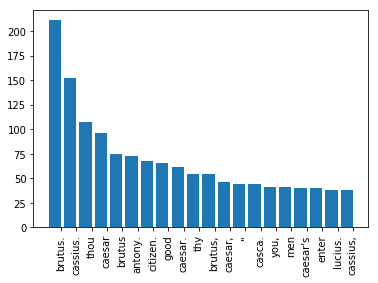

In [181]:
captions, counts = zip(*juliusrdd.flatMap(lambda line : line.split()).map(lambda word : word.strip().lower()).filter(lambda word : word not in stopwords).map(lambda word : (word, 1)).reduceByKey(lambda a,b : a + b).takeOrdered(20, lambda x : -x[1]))

pos = np.arange(len(counts))
plt.bar(pos, counts)
plt.xticks(pos+0.4, captions, rotation=90)

In [184]:
from google.colab import files
upload = files.upload()

Saving astudyinscarlet.txt to astudyinscarlet (1).txt


In [0]:
novelrdd = sc.textFile('*.txt', minPartitions = 4)

In [186]:
novelrdd.collect()

['The Project Gutenberg EBook of A Study In Scarlet, by Arthur Conan Doyle',
 '',
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or',
 're-use it under the terms of the Project Gutenberg License included',
 'with this eBook or online at www.gutenberg.org',
 '',
 '',
 'Title: A Study In Scarlet',
 '',
 'Author: Arthur Conan Doyle',
 '',
 'Posting Date: July 12, 2008 [EBook #244]',
 'Release Date: April, 1995',
 'Last Updated: September 30, 2016',
 '',
 'Language: English',
 '',
 'Character set encoding: UTF-8',
 '',
 '*** START OF THIS PROJECT GUTENBERG EBOOK A STUDY IN SCARLET ***',
 '',
 '',
 '',
 '',
 'Produced by Roger Squires',
 '',
 '',
 '',
 '',
 '',
 'A STUDY IN SCARLET.',
 '',
 'By A. Conan Doyle',
 '',
 '[1]',
 '',
 '',
 '',
 '     Original Transcriber’s Note: This etext is prepared directly',
 '     from an 1887 edition, and care has been taken to duplicate the',
 '     original exactly,

In [187]:
novelrdd.take(10)

['The Project Gutenberg EBook of A Study In Scarlet, by Arthur Conan Doyle',
 '',
 'This eBook is for the use of anyone anywhere at no cost and with',
 'almost no restrictions whatsoever.  You may copy it, give it away or',
 're-use it under the terms of the Project Gutenberg License included',
 'with this eBook or online at www.gutenberg.org',
 '',
 '',
 'Title: A Study In Scarlet',
 '']

In [188]:
(novelrdd.flatMap(lambda line : line.split()).map(lambda word : word.strip().lower()).filter(lambda word : word not in stopwords).map(lambda word : (word, 1)).reduceByKey(lambda a,b : a+b).sortByKey(0,1).take(30))

[('“‘your', 2),
 ('“‘you', 4),
 ('“‘yes.’', 6),
 ('“‘would', 2),
 ('“‘where', 2),
 ('“‘when', 2),
 ('“‘what', 4),
 ('“‘we’ll', 2),
 ('“‘well?’', 2),
 ('“‘there', 2),
 ('“‘tention!”', 2),
 ('“‘so', 2),
 ('“‘rache,’', 2),
 ('“‘possibly', 2),
 ('“‘populus', 2),
 ('“‘perhaps,', 2),
 ('“‘on', 2),
 ('“‘not', 2),
 ('“‘no;', 2),
 ('“‘no', 4),
 ('“‘my', 2),
 ('“‘mr.', 2),
 ('“‘it’s', 2),
 ('“‘it', 4),
 ('“‘i', 6),
 ('“‘he', 2),
 ('“‘god', 2),
 ('“‘but', 4),
 ('“‘at', 4),
 ('“‘arthur', 2)]

In [189]:
from google.colab import files
upload = files.upload()

Saving 01_heights_weights_genders.csv to 01_heights_weights_genders (1).csv


In [190]:
df = pd.read_csv('01_heights_weights_genders.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [0]:
from pyspark.sql import SQLContext
sqlsc = SQLContext(sc)
sparkdf = sqlsc.createDataFrame(df)

In [192]:
sparkdf

DataFrame[Gender: string, Height: double, Weight: double]

In [193]:
sparkdf.show(10)

+------+------------------+------------------+
|Gender|            Height|            Weight|
+------+------------------+------------------+
|  Male|   73.847017017515|  241.893563180437|
|  Male| 68.78190404589029|    162.3104725213|
|  Male| 74.11010539178491|    212.7408555565|
|  Male|  71.7309784033377|  220.042470303077|
|  Male|  69.8817958611153|  206.349800623871|
|  Male|  67.2530156878065|  152.212155757083|
|  Male| 68.78508125166161|183.92788860403098|
|  Male| 68.34851551158789|  167.971110489509|
|  Male| 67.01894966288299|   175.92944039571|
|  Male|63.456493978366396|  156.399676387112|
+------+------------------+------------------+
only showing top 10 rows



In [194]:
type(sparkdf.Gender)

pyspark.sql.column.Column

In [195]:
temp = sparkdf.rdd.map(lambda r : r.Gender)
print(type(temp))
temp.take(10)

<class 'pyspark.rdd.PipelinedRDD'>


['Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male']

# Machine Learning

In [196]:
from pyspark.mllib.classification import LogisticRegressionWithLBFGS
from pyspark.mllib.regression import LabeledPoint

data = sparkdf.rdd.map(lambda row : LabeledPoint(row.Gender == 'Male', [row.Height, row.Weight]))
data.take(5)

[LabeledPoint(1.0, [73.847017017515,241.893563180437]),
 LabeledPoint(1.0, [68.78190404589029,162.3104725213]),
 LabeledPoint(1.0, [74.11010539178491,212.7408555565]),
 LabeledPoint(1.0, [71.7309784033377,220.042470303077]),
 LabeledPoint(1.0, [69.8817958611153,206.349800623871])]

In [197]:
data2 = sparkdf.rdd.map(lambda row : LabeledPoint(row[0] == 'Male', row[1:]))
data2.take(5)[0].label, data2.take(5)[1].features

(1.0, DenseVector([68.7819, 162.3105]))

In [198]:
train, test = data.randomSplit([0.7, 0.3])
train.cache()
test.cache()

PythonRDD[226] at RDD at PythonRDD.scala:53

In [199]:
type(train)

pyspark.rdd.PipelinedRDD

In [200]:
type(test)

pyspark.rdd.PipelinedRDD

In [0]:
model = LogisticRegressionWithLBFGS.train(train)

In [202]:
model.weights

DenseVector([-0.4834, 0.1986])

In [0]:
results = test.map(lambda lp : (lp.label, float(model.predict(lp.features))))

In [204]:
results.take(10)

[(1.0, 1.0),
 (1.0, 0.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 0.0)]

In [205]:
type(results)

pyspark.rdd.PipelinedRDD

In [0]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics
metrics = BinaryClassificationMetrics(results)

In [207]:
print(type(metrics))
metrics.areaUnderROC

<class 'pyspark.mllib.evaluation.BinaryClassificationMetrics'>


0.9158966278531496

In [208]:
type(model)

pyspark.mllib.classification.LogisticRegressionModel

In [0]:
!rm -rf mylogistic.model

In [0]:
sc.stop()